## First look at São Paulo councilpersons and their expenses

This analysis is my first one concerning São Paulo councilpersons and it aims to check the structure of data available as well as some patterns. It does not intend to show irregular use of Legislature Support provided by São Paulo City Council. We will do this later.

To understand Legislature Support, check City Council's website: http://www.camara.sp.gov.br/transparencia/custos-de-mandato/

Thanks to Luiz Cavalcanti for providing the data and inviting me to this first look.

In [1]:
import pandas as pd

dataset = pd.read_csv('../data/saopaulo-chamber-expenses.xz')

In [2]:
len(dataset)

14974

In [3]:
dataset.head()

,key,file_name,cost_center,department,department_type,councilperson,year,month,expense_name,cnpj,company_name,value
0,1222,20150100000000000000000000222.HTML,222,GABINETE DE VEREADOR,1,ABOU ANNI,2015,1,COMBUSTIVEL,43.900.851/0001-01,PROTOTIPO AUTO POSTO LTDA.,300.00
1,1222,20150100000000000000000000222.HTML,222,GABINETE DE VEREADOR,1,ABOU ANNI,2015,1,INTERMEDIADO - CORREIOS,50.176.288/0001-28,CAMARA MUNICIPAL DE SÃO PAULO,6898.40
2,1222,20150100000000000000000000222.HTML,222,GABINETE DE VEREADOR,1,ABOU ANNI,2015,1,MATERIAL DE ESCRITORIO E OUTROS MATERIAIS DE C...,09.338.207/0001-45,LIDERPLAST PLASTIF GRAFICA LTDA.,400.40
3,1222,20150100000000000000000000222.HTML,222,GABINETE DE VEREADOR,1,ABOU ANNI,2015,1,TELEFONE MOVEL,02.558.157/0001-62,TELEFONICA BRASIL S/A,270.24
4,18,201501000000000000000000008.HTML,8,GABINETE DE VEREADOR,1,ADILSON AMADEU,2015,1,COMPOSIÇÃO/ARTE/DIAGRAMAÇÃO/PRODUÇÃO/IMPRESSAO...,02.540.850/0001-08,PHUTURA INOVAÇÕES GRAFICAS LTDA-ME,7952.00


In [4]:
dataset.loc[dataset['key'] == 21224].head(2)

,key,file_name,cost_center,department,department_type,councilperson,year,month,expense_name,cnpj,company_name,value
932,21224,201502000000000000000000001224.HTML,1224,Liderança PMDB,2,Liderança PMDB,2015,2,COMPOSIÇÃO/ARTE/DIAGRAMAÇÃO/PRODUÇÃO/IMPRESSAO...,16.835.211/0001-84,ACTION WORK INDUSTRIA GRAFICA LTDA - ME,7437.5
1982,21224,201504000000000000000000001224.HTML,1224,Liderança PMDB,2,Liderança PMDB,2015,4,CONTRATAÇAO DE PESSOA JURIDICA,22.198.462/0001-06,CABECCA COMUNICAÇÃO E PRODUÇÃO LTDA - ME,5946.0


In [5]:
dataset.loc[dataset['cost_center'] == 59].head(2)

,key,file_name,cost_center,department,department_type,councilperson,year,month,expense_name,cnpj,company_name,value
377,159,2015010000000000000000000059.HTML,59,GABINETE DE VEREADOR,1,RICARDO NUNES,2015,1,COMBUSTIVEL,02.872.106/0001-00,POSTO ISOLA DERIVADOS DE PETROLEO LTDA.,156.0
378,159,2015010000000000000000000059.HTML,59,GABINETE DE VEREADOR,1,RICARDO NUNES,2015,1,CONTRATAÇAO DE PESSOA JURIDICA,08.648.207/0001-89,SOLARYS SOLUÇÕES DIGITAIS LTDA-ME,594.6


In [6]:
dataset.loc[dataset['department_type'] == 3].head(2)

,key,file_name,cost_center,department,department_type,councilperson,year,month,expense_name,cnpj,company_name,value
454,31237,201501000000000000000000001237.HTML,1237,Liderança de Governo,3,Liderança de Governo,2015,1,LOCAÇÃO DE MOVEIS E EQUIPAMENTOS,69.064.053/0001-72,SINALL COM E SERV DE MÁQUINAS LTDA,965.78
455,31237,201501000000000000000000001237.HTML,1237,Liderança de Governo,3,Liderança de Governo,2015,1,MATERIAL DE ESCRITORIO E OUTROS MATERIAIS DE C...,06.226.820/0001-82,CENTER PAPEIS COMERCIAL LTDA.,411.95


#### First impressions

"Cost center" is kind of a unique number for a councilperson, while "department type" may be 1 (for councilperson's office), 2 (for party leadership) or 3 (for government leadership).

"Key" is composed of "department type" + "cost center". For instance, 159: 1 refers to "department type" (an office) and 59 relates to Ricardo Nunes.

I believe that, if a council becomes the party leadership, his "department type" goes from 1 to 2 -- which is good, so we can contrast a councilperson's expense while he is serving as a regular councilperson and while he is the leader of a party.

But there is **no unique number for single expenses**, and this is just terribly awful.

In [7]:
dataset2017 = dataset[dataset['year'] == 2017]

In [8]:
print("Reimbursements in this analysis:", len(dataset2017))
print("Total expenses: R$", dataset2017['value'].sum())
print("Average reimbursement: R$", dataset2017['value'].sum() / len(dataset2017))
print("Reimbursement users:", dataset2017['councilperson'].nunique())
print("Average reimbursement by user: R$", dataset2017['value'].sum() / dataset2017['councilperson'].nunique())
print("Average monthly reimbursement by user: R$", (dataset2017['value'].sum() / dataset2017['councilperson'].nunique() / 8))

Reimbursements in this analysis: 3062
Total expenses: R$ 5531034.18
Average reimbursement: R$ 1806.34689092
Reimbursement users: 75
Average reimbursement by user: R$ 73747.1224
Average monthly reimbursement by user: R$ 9218.3903


In [9]:
dataset_per_subquota = dataset2017.groupby(['expense_name'])\
                                            .agg({'value': sum})\
                                            .sort_values(by='value', ascending=False)\
                                            .reset_index()

dataset_per_subquota['percentage'] = (dataset_per_subquota['value'] / dataset_per_subquota['value'].sum()) * 100
dataset_per_subquota['value'] = dataset_per_subquota['value']
dataset_per_subquota['percentage'] = dataset_per_subquota['percentage'].map("{0:.2f}".format)

dataset_per_subquota

,expense_name,value,percentage
0,COMPOSIÇÃO/ARTE/DIAGRAMAÇÃO/PRODUÇÃO/IMPRESSAO...,1295080.06,23.41
1,CONTRATAÇAO DE PESSOA JURIDICA,1162035.88,21.01
2,ELABORAÇÃO/MANUTENÇAO DE SITE/HOSPEDAGEM,621442.67,11.24
3,INTERMEDIADO - LOCAÇÃO DE VEÍCULOS,552694.20,9.99
4,INTERMEDIADO - CORREIOS,539705.80,9.76
5,MATERIAL DE ESCRITORIO E OUTROS MATERIAIS DE C...,519474.49,9.39
6,LOCAÇÃO DE MOVEIS E EQUIPAMENTOS,304467.46,5.50
7,COMBUSTIVEL,225483.46,4.08
8,TELEFONE MOVEL,69095.04,1.25
9,REPROGRAFIA (XEROX/ENCADERNAÇÃO),64778.83,1.17


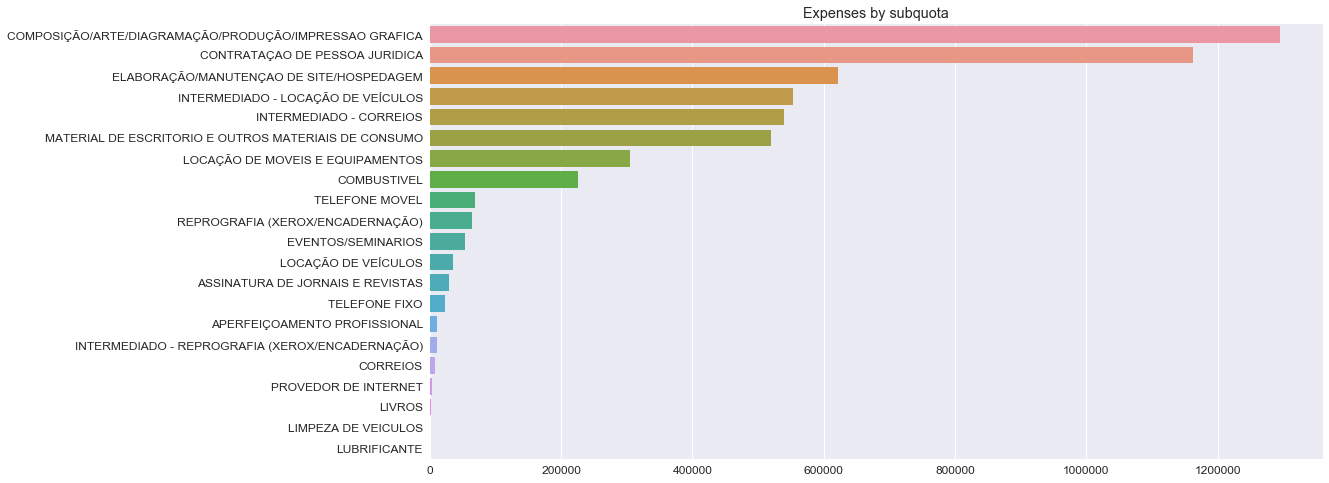

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2)
plt.figure(figsize=(16, 8))
g = sns.barplot(x='value',
                y='expense_name',
                data=dataset_per_subquota)
g.axes.set_title('Expenses by subquota')
g.set_ylabel('')    
g.set_xlabel('')
sns.despine()

In [11]:
dataset_grouped_councilperson = dataset2017.groupby('councilperson')\
                                           .agg({'value': sum})\
                                           .sort_values('value', ascending=False)\
                                           .reset_index()
dataset_grouped_councilperson.head(10)

,councilperson,value
0,EDUARDO TUMA,174314.59
1,TONINHO PAIVA,164197.01
2,ABOU ANNI,163738.47
3,RICARDO NUNES,156575.43
4,NOEMI NONATO,151021.45
5,JULIANA CARDOSO,149878.41
6,JAIR TATTO,148036.62
7,RICARDO TEIXEIRA,146977.48
8,DALTON SILVANO,146680.29
9,EDUARDO MATARAZZO SUPLICY,141873.66


In [12]:
dataset_grouped_company = dataset2017.groupby(['company_name', 'cnpj'])\
                                     .agg({'value': sum})\
                                     .sort_values('value', ascending=False)\
                                     .reset_index()
dataset_grouped_company.head(20)

,company_name,cnpj,value
0,CAMARA MUNICIPAL DE SÃO PAULO,50.176.288/0001-28,1102567.98
1,CENTER PAPEIS COMERCIAL LTDA.,06.226.820/0001-82,272284.10
2,ATTBRASIL TECNOLOGIA LOCAÇÃO E SOLUÇÕES EM INF...,22.392.165/0001-99,91638.76
3,FORMA CERTA GRAFICA DIGITAL LTDA,07.691.829/0001-27,86478.83
4,VISTAR PRESTAÇÃO DE SERVIÇOS DE DIGITAÇÃO LTDA ME,08.689.647/0001-84,86130.00
5,WORK LINE SYSTEM INFORMÁTICA LTDA,67.002.329/0001-62,85894.41
6,K2G SUPRIMENTOS DE IMPRESSÃO E INFORMATICA EIR...,19.367.661/0001-88,81566.62
7,YRGRAF ARTES GRAFICAS LTDA ME,56.055.833/0001-04,71806.45
8,LEANDRO SOUZA FERREIRA ME,26.554.426/0001-80,70337.80
9,ARTE LU E RO GRAFICA EIRELI,18.588.528/0001-99,69826.19


In [13]:
dataset_over_limit = dataset2017.groupby(['councilperson', 'month'])\
                                           .agg({'value': sum})\
                                           .sort_values('value', ascending=False)\
                                           .reset_index()
            
dataset_watchlist = dataset_over_limit[dataset_over_limit['value'] >= 23503.13].sort_values('councilperson', ascending=True)
dataset_watchlist

,councilperson,month,value
0,ABOU ANNI,6,45059.41
1,ABOU ANNI,7,42435.86
6,ABOU ANNI,5,30380.53
4,ADILSON AMADEU,7,31677.08
8,ADILSON AMADEU,5,29512.74
14,ANDRÉ SANTOS,5,25213.37
20,DALTON SILVANO,3,23888.29
17,EDUARDO TUMA,3,24102.28
16,EDUARDO TUMA,5,24574.85
11,EDUARDO TUMA,6,26270.88


#### Second impressions

According to City Council, "each councilperson has the yearly amount of 282,037.56 reais (montly average amount of 23,503.13)". This monthly amount is cumulative, so it is not unusual to see a councilperson expending more than 23,5K a month or another. What we must check is whether this behavior happens frequently (as it does with Eduardo Tuma and Abou Anni).

This analysis is in development.